<font size=6> **RQ: Finding Optimal Path for completing the "Tube Challenge" with Reinforcement Learning** </font>




# Abstract

In this project, we trialled and compared the performance of multiple reinforcement learning algorithms on the task of finding an optimal path for completing the “Tube Challenge”, which involves travelling to all London Underground stations in the shortest time possible. We modelled the problem as a set-Travelling Salesman Problem and coded a graphical representation of the Tube environment from scratch. An epsilon greedy policy was designed such that epsilon greedy action is selected only at interchange stations. A multicomponent reward function was designed and aims to encourage travel to all stations with the least number of steps. Various combination of weightings of the components were trialled as hyper-parameters to find a decently good combination, and compared 5 models preliminarily across 5 runs of 10 episodes each with these settings. With the results for SARSA and Deep Q-Learning being the most promising, we trained these two models further by further tuning their hyper-parameters and running them for more episodes – 100 for Deep Q-Learning and 500 for SARSA. Comparing the two models at the 100th episode reveals SARSA performs better than Deep Q-Learning by far both in terms of number of steps taken for the optimal route and also computation time required. Further training SARSA to 500 episodes unfortunately yield no significant improvement in performance. The lowest number of steps for an episode in our SARSA model is 1647 steps, whereas the number of steps for a known route in the Tube challenge is 433 steps. 

# Table of Contents

>[Abstract](#scrollTo=32VpLaLA_G_1)

>[Table of Contents](#scrollTo=XQSg4nhw_WlD)

>[1. Introduction](#scrollTo=0m_LJJzS_LTX)

>[2. Methodology](#scrollTo=cCM2B7st__Ua)

>>[2.1 Dataset](#scrollTo=Sl-4HSf3FniW)

>>[2.2 Reinforcement Learning Algorithms](#scrollTo=B4jXcBV9Fqal)

>>>[2.2.1 First-Visit Monte Carlo (FVMC)](#scrollTo=B4jXcBV9Fqal)

>>>[2.2.2 SARSA](#scrollTo=B4jXcBV9Fqal)

>>>[2.2.3 Q-Learning](#scrollTo=B4jXcBV9Fqal)

>>>[2.2.4 Neural Fitted Q-Iteration (NFQI)](#scrollTo=B4jXcBV9Fqal)

>>>[2.2.5 Deep Q-Learning (DQL)](#scrollTo=B4jXcBV9Fqal)

>[3. Implementation](#scrollTo=9qcOn1zQAPfn)

>>[3.1 Setup](#scrollTo=EfASwI5LAFGw)

>>[3.2 Defining the Environment](#scrollTo=wz-fjHA9A6_I)

>>[3.3 Defining a Policy](#scrollTo=VEhwZdAeA_xV)

>>[3.4 Defining Agents](#scrollTo=WLodW80eBPPT)

>>>[3.4.1 Defining a General Agent Class](#scrollTo=uXsXV1j5BYES)

>>>[3.4.2 First-Visit MC](#scrollTo=X_jP7PqyBNUp)

>>>[3.4.3 SARSA](#scrollTo=HSGUeQeXBycd)

>>>[3.4.4 Q-Learning](#scrollTo=2xA5UC1GBdOF)

>>>[3.4.5 Neural Fitted Q Iteration](#scrollTo=w97wbGT1BLvX)

>>>[3.4.6 Deep Q Learning](#scrollTo=ZUk0xYYDB1QW)

>>[3.5 Initial Training Loop for all Agents](#scrollTo=wtkoN7lnCcY1)

>>>[3.5.1 Code](#scrollTo=971jiI3cowh6)

>>>[3.5.2 Initial Plots and Results](#scrollTo=3EKuQ_RvoWDu)

>>[3.6 Training for SARSA and Deep Q-Learning](#scrollTo=9IM_Qq-gDyjq)

>>>[3.6.1 SARSA](#scrollTo=mWKxAGvHbjyy)

>>>>[3.6.1.1 Hyperparameter Tuning](#scrollTo=T33xw7PhbvcB)

>>>>>[Tuning for alpha](#scrollTo=WuTlwJKdfZGf)

>>>>>[Tuning for epsilon decay rate](#scrollTo=YtY8NQgAfsUa)

>>>>[3.6.1.2 Model at 100 episodes](#scrollTo=feusz4p6b1qb)

>>>>[3.6.1.3 Model at 500 episodes](#scrollTo=vaH98jilb9GR)

>>>[3.6.2 Deep Q-Learning](#scrollTo=MMdcEZ53b_kB)

>>>>[3.6.2.1 Hyperparameter Tuning](#scrollTo=o2zEzgd4cGUT)

>>>>[3.6.2.2 Model at 100 episodes](#scrollTo=nDFoYwOycCa3)

>[4. Final Results and Discussion](#scrollTo=L7zPlXrqD5zr)

>>[4.1 Comparing SARSA and Deep Q-Learning at 100 Episodes](#scrollTo=q3CFSLVOpzZ_)

>>[4.2 SARSA at 500 Episodes](#scrollTo=C1vlnEDsqLHa)

>>[4.3 Visualising Final Route](#scrollTo=3e6-uj0xqNid)

>>>[4.3.1 Tube Route Animation Function](#scrollTo=jXmPZdFkEP1F)

>>>[4.3.2 Visualisations](#scrollTo=as_buqnhyDRh)

>[5. Conclusion](#scrollTo=GsrV3D76Al2V)

>[6. References](#scrollTo=8EH4F26tAnbA)



# 1.&nbsp;Introduction

The "Tube Challenge" is a Guinness World Record recognised competition to travel to all London Underground (Tube) stations in the shortest time possible. An underground station is considered visited if one arrives at, depart from or passes through the station on at least one of its lines. By the official rules of the challenge, it is acceptable to connect between stations on foot or by using other forms of public transport (The Telegraph, 2016). The record for the fastest completion is held by Andi James (Finland) and Steve Wilson (UK) who completed the challenge in 15 hours, 45 minutes and 38 seconds on 21st May 2015 and travelled across 270 stations, though as of September 2021 the Northern line extension has added two more stations, making the total number of tube stations currently 272 (Guinness World Records, 2016).

The goal of our project is to apply reinforcement learning algorithms to find a hypothetically optimal route for completing the tube challenge. We thought it would be interesting to find out if there is a more optimal route than the one taken by previous record-holders, given the relatively complex nature of the London underground system. We also hope to explore the suitability of applying various reinforcement learning algorithms in solving a shortest path problem. 

The problem of finding a shortest route through all tube challenges can be modelled as a Set-Travelling Salesman Problem (Set-TSP) (as known as the generalised TSP). 

The original TSP asks the following question: given a set of nodes and the distances between every pair of nodes, what is the shortest possible route that visits every node exactly once and returns to the origin node?" The set-TSP generalises the TSP, whereby the agent is instead required to visit one node from each disjoint subset of nodes of the graph.

In our context, we consider a graphical representation of the system, where the stations are the nodes and the connections between the stations are the edges. It is similar to the ordinary TSP (which finds the shortest possible route through a list of cities exactly once and returns to the origin city), except:
- The agent doesn't need to return to the origin, as this is not required by the "Tube Challenge".
- The agent can visit the same node multiple times. This is because it might be impossible to visit every tube station but also only visit each station exactly once;
- The network does not form a complete graph, i.e., not every node is connected to every other node.

Solving this problem is non-trivial due to the complexity of the graph. It is well known that the TSP is a NP-hard problem, where it is difficult to find a solution, but it is easy and quick to verify the correctness of a given solution.

A naive solution that involves trying all possible permutations, which is definitely impractical for our graph with 272 stations and 1,927 of edges. Another solution would be to apply dynamic programming as we have a known and fixed graph. However, this would involve solving 1,927 of Bellman equations to find the state value function at every node, which is again computationally impractical. 

Some challengers for the Tube Challenge have documented their journey and experience online. One of these challengers created a blog page which outlines how they attempted to find the optimal route computationally, which involves simplification to the network such as removing some intermediate stations (Gawley, 2011). We took inspiration from their consideration of the irrelevance of some intermediate stations but took a more rigorous approach than their relatively heuristics-based approach. 

We also reviewed literature more generally for solving routing problems with reinforcement learning algorithms, which inspired the algorithms we chose to trial. Zheng et al. (2021) proposes a variable strategy reinforced approach which combines Q-learning, SARSA and Monte Carlo with a TSP-algorithm called Lin-Kernighan-Helsgaun (LKH) with promising results on up to 85,600 cities. Ottoni et al. (2022) evaluates the performance of Q-learning and SARSA on traveling salesman problem with refuelling. Several literature applied deep Q-learning methods, such as Gambardella & Dorigo (1995) with Ant-Q, which combines distributed algorithm ant system with Q-learning, for improved and faster performance. 


# 2.&nbsp;Methodology

## 2.1 Dataset

To create the environment for our project, we adapted the datasets that describe the London Underground System from the *tubemaps* GitHub repository (Nicola, 2017), which is a NodeJs library for handling such data. We use these datasets to build up a graphical representation of the system, where the stations are the nodes and the connections between the stations are the edges. 

The initial datasets consist of three files: 
1. lines.csv: 11 line names and corresponding `line id`
2. stations.csv: 272 station names and corresponding `station id`
3. dist.csv: 406 pairs of connected stations and the line connecting the two

We made multiple additions and changes to stations.csv and dist.csv to set up the environment for our purpose and/or help improve the performance of the model. These are: 
1. Adding tube travel distance and updating tube travel time for all pairs of connected stations according to updated information from the Transport for London (TfL) Working Timetables (WTT) website. A web scrape was performed for the working timetables of all lines to extract the information. In the working timetables, distance was rounded to the closest 10 metres and time was rounded to the closest 5 seconds. 
 
2. Adding platforms to each station. Platforms were added for each line and each direction at every station as a sub-station. For example, Holborn (id = 113) has four sub-stations: Holborn (ce) (id = 113.1), Holborn (cw) (id = 113.2), Holborn (pe) (id = 113.3) and Holborn (pw) (id = 113.4). 'cw' refers to the Central line Westbound platform, and 'pe' refers to the Piccadilly line Eastbound platform. As long as at least one station with id that starts with 113 is visited, then we consider the Holborn station to be visited by the agent. 

3. Adding line-specific edges. Instead of having edges that connect directly from station to station, the edges now connect at the platform level to correspond to the addition of platforms made. For example, the edge between Holborn and Chancery Lane is now the edge between Holborn (ce) and Chancery Lane (ce). The edges are directional such that we would have a separate edge for Chancery Lane (cw) and Holborn (cw). Furthermore, edges were added from every sub-station to station and vice versa. Hence, we have 12 edges which starts from either the station Holborn or a substation in Holborn: 
  - Holborn & Holborn (ce)
  - Holborn (ce) & Holborn
  - Holborn & Holborn (cw)
  - Holborn (cw) & Holborn
  - Holborn & Holborn (pe)
  - Holborn (pe) & Holborn
  - Holborn & Holborn (pw)
  - Holborn (pw) & Holborn
  - Holborn (ce) & Chancery Lane (ce)
  - Holborn (cw) & Tottenham Court Road (cw)
  - Holborn (pe) & Russell Square (pe)
  - Holborn (pw) & Covent Garden (pw)
  
    When there are sections of the tube where multiple lines operate on the same platform, the edges are lumped together. For example, the edge between Euston Square (rhme) and Kings Cross St Pancras (rhme), as on this section the Circle, Hammersmith & City and Metropolitan lines share the same platform and tracks.

4. Adding known walking distance for edges between stations. These edges are either indicated as dotted lines on the Tube map, or they are part of an "optimal" route from an attempt in 2009 (O'Brien and Cheshire, 2015), and were added such that the agent can consider whether there are benefits from taking these routes. The walking travelling time and distances were taken from Google Maps data. We did not add all possible walking edges between all stations as this would add $272 \times 271 = 73,712$ edges and a lot of complexity to the problem when almost all of these edges are not going to be part of the optimal solution. We also did not add public transport route for similar reasons. 

5. Flagging for starting stations. Terminus stations of all the tube lines were identified and flagged as starting stations, such that the agents would only choose a starting station within this set of starting stations, as it is always more optimal to start from one of the terminus stations. This saves computational cost from getting our agent to learn this known relationship. 

6. Flagging for two-dimensional (2d) stations. "Two-dimensional" refers to stations where it is only possible to travel in two directions from the station through Tube. They are typically stations that are in the middle of a line and are not interchange stations nor stations that are connected to walking edges. When an agent is in one of these stations, it is always more optimal to continue going in the direction they arrived at the station in, as the only other option would be to go back to a station they have already been to. This flag enabled us to code this behaviour into our agent's policy and again saves computational cost from getting our agent to learn this known relationship.

## 2.2 Reinforcement Learning Algorithms

We first trialled multiple algorithms preliminarily as we had conflicting hypotheses about what algorithms would perform better. It was possible that off-policy methods which looks at the entire taken path after an episode could perform better as it examines a complete (or close to complete) path as a whole, but on-policy methods with updates after every step could learn an optimal path more quickly. Furthermore, there are merits both to learning through updating Q-values first or updating the policy directly. 

We initially trialled the First-Visit Monte Carlo (FVMC) algorithm, which is an on-policy control algorithm that returns an optimal policy. We hoped to see if a relatively straightforward Monte Carlo method would suffice for finding an optimal solution. 

Then, we decided to try SARSA, an on-policy temporal difference method for policy optimisation which estimates the state-action value function (Q-function) after every time step in an episode. 

Finally, we explored Q-learning and trialled multiple variants of Q-learning to explore whether off-policy learning may perform better in Q-function estimations. We trialled 3 Q-learning algorithms in total, which include the simple Q-learning, Neural Fitted Q-Iteration (NFQI) and Deep Q-Learning (DQL). 

For all policies, we consider the current state $s_t$ as the station which the agent (following a particular algorithm) is at during step $t$. At every $s_t$, the agent can choose to go to several other stations, thus each of these stations are an action $a_t$. Thus, $s_{t+1} = a_{t}'$ for action $a_t'$ taken by the agent. We only consider state-action pairs where $a_t$ is a feasible action from $s_t$, such that $s_t$ and $a_t$ are connected by at least one edge. 

The following sub-sections detail the 5 algorithms we used in further detail. 

### 2.2.1 First-Visit Monte Carlo (FVMC)

The FVMC algorithm uses Monte Carlo estimation to learn an optimal policy. It updates Q-values for state-action pairs with the averaged return for the first occurrence of that state-action pair. Then, it updates the policy for an action in each state with the Q-values with an epsilon greedy policy. It is an on-policy algorithm since the policy is being continuously updated during the episode. 

We chose to use the First-Visit Monte Carlo instead of Every-Visit Monte Carlo as we thought that the return from the first visit to a station is likely more informative than that of subsequent visits, as subsequent visits occur to enable first-time visits to other stations. An epsilon greedy exploration policy is employed to ensure continual exploration of all reasonable actions. 

For each first observed state-action pair in each episode, the Q-value is updated as follows: 

$$Q(s_t, a_t) ← \text{average}(\text{Returns}(s_t, a_t))$$

where $\text{Returns} (s_t, a_t)$ is a measure of cumulative return over all first visits to this state-action pair across all episodes up to that point. The optimal action at $s_t$ according to the Q-table is selected with $A^* = \arg\max_{a} Q(s_t, a)$. Finally, the policy is updated according to the following epsilon-greedy based rule, such that for all $a \in \mathcal{A}(s_t)$: 

$$ 
\pi(a, s_t) ←
\begin{cases}
1 - \varepsilon + \varepsilon / |\mathcal{A}(s_t)| &\text{if } a = A^* \\
\varepsilon / |\mathcal{A}(s_t)| &\text{otherwise}
\end{cases}
$$

where $|\mathcal{A}(s_t)|$ is the number of possible actions from $s_t$. 

The pseudo-code for the algorithm is as below (Sutton and Barto, 2018): 

![images/fvmc.png](images/fvmc.png)

### 2.2.2 SARSA

The SARSA algorithm updates the Q-values for every state and action pair incrementally with the following equation for non-terminal state $s_{t+1}$: 

$$Q(s_t, a_t) ← Q(s_t, a_t) + \alpha[r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]$$

and returns $Q(s_{t+1}, a_{t+1}) = 0$ for terminal state $s_{t+1}$. 

The update is done for every step in every episode and is thus an on-policy algorithm. 

The pseudo-code for the algorithm is as below, taken from Sutton and Barto: 

![images/sarsa.png](images/sarsa.png)

### 2.2.3 Q-Learning 

The Q-learning algorithm updates the Q-values for every state and action pair in the episode after the episode has terminated. When updating the Q-values, the agent follows a greedy policy where the action that yields the maximum Q-value is selected.

$Q(s_t, a_t) ← Q(s_t, a_t) + \alpha[r_t + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)]$

The pseudo-code for the algorithm is as below, taken from Sutton and Barto: 

![images/qlearning.png](images/qlearning.png)

### 2.2.4 Neural Fitted Q-Iteration (NFQI)

Similar to the Q-learning algorithm, the neural fitted Q iteration algorithm updates the Q-values are updated according to a greedy policy. However, we approximate the Q value as a linear function. In this setting, we represent the Q-function using a neural network.

$\hat{Q}(s_t, a_t) ← \arg\min_Q \sum_{t} [r_t + \gamma \max_a \tilde{Q}(s_{t+1}, a) - Q(s_t, a_t)]^2$

Then we update the Q-function:
$\tilde{Q} \leftarrow \hat{Q}$

The pseudo-code for the algorithm is as below, taken from the lecture slides:

![images/nfqi.png](images/nfqi.png)

### 2.2.5 Deep Q-Learning (DQL)

The Deep Q-Learning algorithm is similar to NFQI, except that we now use two neural networks to approximate the Q-Network: a local network and a target network. 

For every $t$ steps we sample a random minibatch of transitions from the replay memory $\mathcal{M}$, and perform stochastic gradient descent (SGD) to update the local network. 

$\theta \leftarrow \theta - \alpha_t \cdot \frac{1}{n} \sum_{i\in[n]} [r_i + \gamma \max_a Q_{\theta^*}(s_i', a) - Q_\theta (s_i, a_i) ] \cdot \nabla_\theta (s_i, a_i)$

A soft update is then applied to the target network:

$\theta^* \leftarrow \lambda \theta + (1-\lambda) \theta^*$

where $\theta$ represent the weights of the local network, $\theta^*$ represent the weights of the target network and $\lambda$ is a hyperparameter.

The pseudo-code for the algorithm is as below, taken a screenshot embedded in the lecture slides:

![images/dql.png](images/dql.png)



# 3.&nbsp;Implementation

## 3.1 Setup

In [122]:
# for local
dist_csv = "dataset/new/dist2.csv"
lines_csv = "dataset/new/lines2.csv"
stations_csv = "dataset/new/stations3.csv"

In [123]:
from collections import defaultdict, deque, namedtuple
from datetime import datetime
from IPython.display import clear_output, Video
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FFMpegWriter, FuncAnimation
import numpy as np
import pandas as pd
import pickle
import random
import torch
from torch import nn, optim
from torch.nn import functional as F
from tqdm.notebook import tqdm

## 3.2 Defining the Environment


Using the dataset, we define a custom `TubeMap` class for the agent to interact within.

In this `TubeMap` class, we use a state-dependent action space, where for a given state, there is a selected number of actions available. Actions are given as the id of the next state. At each step, the agent queries the possible actions available for the current state. 

The state is represented by the id of the node, as well as (optional) information that may be given to agent as additional information in order to make a more informed decision when taking an action, including:
- The direction, i.e. if the agent is travelling eastbound, it is likely that the agent would want to continue to travel eastbound;
- Whether the station is two-dimensional

The episode is terminated when one of the following conditions are true:
- The agent has visited all 272 stations (at least one node from each station; it is not necessary to have visited every node, as a station may be served by multiple lines, but it is only necessary to visit the station once); or
- The episode step limit $T$ was reached.

The immediate reward given after taking some action is given as follows:
$$
R(s,a,t) = - d(s,a) - \beta \frac{t}{\sum_a N(a)} - \eta N(a)  + B (T-t) \times \mathbf{1}\{\text{is terminal}\}
$$
where:
- $d(s,a)$ is a distance metric between $s$ and $a$, possible options are "physical distance" and "travel time"; this is not symmetric.
- $N(a)$ is the number of times (including the station to be visited next) the agent has visited any node belonging to station $a$;
- $\sum_a N(a)$ is the number of stations (including the station to be visited next) the agent has visited so far
- $t$ is the number of steps taken since tbe beginning of the episode;
- $T$ is the limit to the number of steps before the episode is terminated, default 20001;
- $B$ is the reward bonus for successfully visiting all 272 stations, default $B=0$;
- $\beta$ and $\eta$ are hyperparameters, default $\beta=1.0, \eta=1.0$.

The first term measures the distance between $s$ and $a$. The second term encourages the agent to minimise the number of steps taken, since the more steps taken the more negative the reward will be. The third term encourages the agent to explore previously unvisited stations, as repeatedly visiting the same station will yield a more negative reward. The final term rewards the agent for successfully completing the task (visiting all 272 stations), and is proportional to the number of steps remaining from the episode step limit, so the agent is encouraged to complete the task with as few steps as possible.

The table of Q-values is also stored in this environment, and can be initialised with any arbitrary value. By default, it is initialised to be $0$ for all $Q(s,a)$.

In [ ]:
class TubeMap:
  def __init__(self, 
               dist_table, 
               station_table, 
               initial_state=0, 
               metric="time",
               q_table=True, 
               q_table_initialiser=0.0,
               count_visits=True,
               beta=1.0, 
               eta=1.0, 
               complete_bonus=0,
               steps_limit=20001,
               *args, **kwargs):
    assert metric in ["dist", "time"], "Invalid selection of metric."
    self.metric = metric
    self.initial_state = initial_state
    self.state = initial_state
    self.reward = 0.0
    self.not_yet_visited = set(np.arange(1,273,1.0))
    self.num_visited = 1
    self.is_terminal = False
    self.dist_table = pd.read_csv(dist_table)
    self.station_table = pd.read_csv(station_table)
    self.neighbours = self.get_neighbours(self.state)
    self.steps = 0
    self.beta = beta
    self.eta = eta
    self.count_visits = count_visits
    self.complete_bouns = complete_bonus
    self.steps_limit = steps_limit
    if q_table:
      self.q_table_initialiser = q_table_initialiser
      self.q_table = self.initialise_q_table()
    if self.count_visits:
      self.visit_counter = {n:0 for n in np.arange(1,273,1.0)}

  def step(self, action):
    self.steps += 1
    self.update_visited(action)
    self.reward = (-1.0 * (self.neighbours[self.neighbours["id2"] == action][self.metric].values[0]) 
                - (self.beta * self.steps / self.num_visited) 
                - (self.eta * self.visit_counter[np.trunc(action)]) 
                + ((self.steps_limit - self.steps) * self.complete_bouns * self.is_terminal))

    self.state = action
    self.neighbours = self.get_neighbours(action)
    return self.state, self.reward, self.is_terminal
  
  def get_neighbours(self, state):
    return self.dist_table[self.dist_table["id1"] == state]

  def get_previous_neighbours(self, state):
    return self.dist_table[self.dist_table["id2"] == state]

  def get_available_actions(self, state):
    return list(self.dist_table[self.dist_table["id1"] == state]["id2"])

  def update_visited(self, state):
    visited_station = np.trunc(state)
    self.not_yet_visited.discard(visited_station)
    self.is_terminal = bool(not self.not_yet_visited)
    self.num_visited = 272 - len(self.not_yet_visited)
    if self.count_visits:
      self.visit_counter[visited_station] += 1

  def initialise_q_table(self):
    if self.q_table_initialiser != 0:
      q_table = self.dist_table[["id1", "id2", "station1", "station2", "direction1", "direction2", "flag", "2d", self.metric]].copy()
      q_table = q_table.rename(columns={self.metric: "q"})
      q_table["q"] = q_table["q"].apply(lambda x: -1.0 * x)
    else:
      q_table = self.dist_table[["id1", "id2", "station1", "station2", "direction1", "direction2", "flag", "2d"]].copy()
      q_table["q"] = self.q_table_initialiser
    return q_table

  def get_q_table_neighbours(self, state):
    return self.q_table[self.q_table["id1"] == state]
  
  def get_station_name(self, state):
    return self.station_table[self.station_table["id"]==state]["station"].values[0]

  def reset(self):
    self.state = self.initial_state
    self.reward = 0.0
    self.num_visited = 1
    self.steps = 0
    self.is_terminal = False
    self.not_yet_visited = set(np.arange(1,273,1.0))
    self.neighbours = self.get_neighbours(self.state)
    if self.count_visits:
      self.visit_counter = {n:0 for n in np.arange(1,273,1.0)}
    return self.state

## 3.3 Defining a Policy

We define a variant of $\varepsilon$-greedy policy with a decaying $ɛ$ that is biased.

There are two possible decay strategies available:
- `pow`: $ɛ \leftarrow \max\{ɛ_\text{min}, ɛ_\text{max}\mu^t \}$;
- `exp`: $ɛ \leftarrow \max\{ɛ_\text{min}, ɛ_\text{max}e^{-\mu t} \}$

where $\mu$ is the decay rate and $t$ is the number of steps.

It is also possible to only begin decay after the agent has successfully visited all stations in a previous episode, since the episode will terminate after a fixed number of steps regardless of whether the agent has successfully visited all stations.

When selecting an action, if a station is "2d", we favour selecting the action that has the same "direction" as the current state. This is controlled by the hyperparameter $\tau$.

Furthermore, for FVMC, the agent will select an action according to $\pi(\cdot)$

In [ ]:
class EpsilonGreedyPolicy:
  def __init__(self, 
               max_epsilon=1.0, 
               min_epsilon=0.00001, 
               decay_rate=0.999, 
               strategy="pow", 
               smart_decay=False):
    self.steps = 0
    self.min_epsilon = min_epsilon
    self.max_epsilon = max_epsilon
    self.strategy = strategy
    if smart_decay:
      self.decay_rate = 1.0
      self.smart_decay_rate = decay_rate
    else:
      self.decay_rate = decay_rate

  def get_epsilon(self, delta):
    # delta represent whether the agent has successfully complete the task in a previous episode
    # used for smart decay only
    if delta:
      self.steps += 1
    # decay strategies
    if self.strategy == "pow":
      return max(self.min_epsilon, self.max_epsilon * (self.decay_rate ** self.steps))
    elif self.strategy == "exp":
      return max(self.min_epsilon, self.max_epsilon * np.exp(-self.decay_rate * self.steps))

  def get_action(self, obs, q_table, visit_counter, epsilon="auto", 
                 tau=0.1, have_succeeded=False, mc=False):
    # get the direction of the current station
    current_dir = q_table[q_table["id1"]==obs]["direction1"].values[0]
    
    # set the decay rate
    if (epsilon == "smart") and have_succeeded:
      self.decay_rate = self.smart_decay_rate
      
    if (epsilon == "auto") or (epsilon == "smart"):
      epsilon = self.get_epsilon(have_succeeded)
      
    # select the next action 
    if np.random.binomial(1, epsilon) == 1:
      neighbours = list(q_table["id2"])
      neighbours_directions = list(q_table["direction2"])
      neighbours_flags = list(q_table["flag"])
      neighbours_is2d = list(q_table["2d"]) 
      p = []
      # select action based on Q-values with bias to direction for 2d stations
      for d,f,s in zip(neighbours_directions, neighbours_flags, neighbours_is2d):
        if f == "t":
          if d == current_dir:
            if s:
              p.append(1)
            else:
              p.append(tau)
          else:
            p.append(tau)
        elif f == "a":
          p.append(1)
        else:
          p.append(tau)
      if np.sum(p) > 0:
        p = [x / np.sum(p) for x in p]
      else:
        p = [1 / len(p) for x in p]
      return np.random.choice(a=neighbours, p=p)
    else:
      if mc:
        # for FVMC only - select action based on the updated probabilities
        neighbours = list(q_table["id2"])
        p = list(q_table["pi"])
        if np.sum(p) > 0:
          p = [x / np.sum(p) for x in p]
        else:
          p = [1 / len(p) for x in p]
        return np.random.choice(a=neighbours, p=p)
      else:
        # otherwise, select action based on Q-values with bias to direction for 2d stations
        neighbours = list(q_table.loc[q_table["q"] == q_table["q"].max()]["id2"])
        p = [tau for _ in neighbours]
        if q_table.iloc[0]["2d"]:
          q_table_1 = q_table[q_table["direction2"] == current_dir]["id2"]
          if q_table_1.shape[0] != 0:
            neighbours_2d = list(q_table_1)
            for _ in neighbours_2d:
              p.append(1)
            neighbours += neighbours_2d
        if np.sum(p) > 0:
          p = [x / np.sum(p) for x in p]
        else:
          p = [1 / len(p) for x in p]
        return np.random.choice(a=neighbours, p=p)

## 3.4 Defining Agents

### 3.4.1 Defining a General Agent Class

We define a base class for all agents. This base class is designed for off-policy evaluation, i.e. the agent first generates an episode using the $ɛ$-greedy policy, then the policy is evaluated to update the Q-table after the episode has terminated using the `policy_evaluation()` method.

An on-policy agent (such as SARSA_ can also use this base class by overriding the `run()` method and not implementing the `policy_evaluation()` method.

The DQL agent also overrides the `run()` method as it updates the local and target networks every $T_\text{target}$ number of steps and not after the entire episode was generated.

In [ ]:
class Agent:
  def __init__(self, env, policy, 
               state_progress=False, episode_length_limit=10001, tau=0.1,
               *args, **kwargs):
    self.env = env
    self.obs = env.reset()
    self.policy = policy
    self.state_history = list()
    self.state_history_unique = set()
    self.reward_history = list()
    self.done_history = list()
    self.done = False
    self.state_progress = state_progress
    self.episode_length_limit = episode_length_limit
    self.tau = tau
    self.succeeded = False
    
    # for epsilon-greedy policy
    self.mc = False
    self.onpolicy = False

    # statistics
    self.num_visited_per_episode = list()
    self.reward_per_episode = list()
    self.steps_per_episode = list()

  def run(self, num_episodes):
    for e in tqdm(range(num_episodes), bar_format="{elapsed} {bar} Episode: {n_fmt}/{total_fmt}"):
      self.obs = self.env.reset()
      self.env.steps_limit = self.episode_length_limit
      self.state_history = list()
      self.state_history_unique = set()
      self.state_history.append(self.obs)
      self.reward_history = list()
      self.done_history = list()

      inner_pbar = tqdm(total=self.episode_length_limit-1, leave=True, disable=not self.state_progress,
                        bar_format="{elapsed} {bar}  Steps: {n_fmt}/{total_fmt} {desc}")
      while not self.done and len(self.state_history) < self.episode_length_limit:
        action = self.policy.get_action(self.obs, self.env.get_q_table_neighbours(self.obs), self.env.visit_counter, 
                                        epsilon="smart", tau=self.tau, have_succeeded=self.succeeded)
        obs, reward, done = self.env.step(action)
        self.state_history.append(obs)
        self.reward_history.append(reward)
        inner_pbar.update(1)
        if np.trunc(obs) in self.state_history_unique:
          pass
        else:
          self.state_history_unique.add(np.trunc(obs))
        inner_pbar.set_description(f"Number of stations visited: {len(self.state_history_unique)} Current station: {self.env.get_station_name(obs)} (visited {self.env.visit_counter[np.trunc(obs)]} times)")

        if done:
          self.done_history.append(1)
          self.succeeded = True
          break
        else:
          self.done_history.append(0)
          self.obs = obs
          self.done = done

      inner_pbar.close()
      self.steps_per_episode.append(self.env.steps)
      self.num_visited_per_episode.append(len(self.state_history_unique))
      self.reward_per_episode.append(sum(self.reward_history))
      self.policy_evaluation()


  def policy_evaluation(self):
    pass

### 3.4.2 First-Visit MC

In [ ]:
class FirstVisitMC(Agent):
  def __init__(self, 
               gamma=0.9, 
               kappa=0.1, 
               *args, **kwargs):
    self.gamma = gamma
    self.kappa = kappa
    super().__init__(*args, **kwargs)
    self.env.q_table["pi"] = 0.0
    self.r_s_a = defaultdict(list)
    self.mc = True

  def policy_evaluation(self):
    G = 0
    sh = self.state_history
    T = len(sh)-1

    # Loop for each step of episode
    for t in range(T-1, -1, -1):
      St, At = sh[t], sh[t+1]
      Rt_1 = self.reward_history[t]
      G = self.gamma * G + Rt_1
      q_table = self.env.q_table


      if not (St, At) in [(sh[i], sh[i+1]) for i in range(0, t)]:
        
        # Update q table
        self.r_s_a[(St, At)].append(G)
        q_table.loc[((q_table.id1 == St) & (q_table.id2 == At)), 'q'] = np.average(self.r_s_a[(St, At)])

        # Find A*
        q_table_n = self.env.get_q_table_neighbours(St)
        actions = self.env.get_available_actions(St)
        A_star = np.random.choice(list(q_table_n.loc[q_table_n["q"] == q_table_n["q"].max()]["id2"]))

        # Update Policy
        for a in actions:
          if a == A_star:
            q_table.loc[((q_table.id1 == St) & (q_table.id2 == a)), 'pi'] = 1 - self.kappa + self.kappa/len(actions)
          else:
            q_table.loc[((q_table.id1 == St) & (q_table.id2 == a)), 'pi'] = self.kappa/len(actions)

        # Update Self q table
        self.env.q_table = q_table

### 3.4.3 SARSA

In [ ]:
class SARSAAgent(Agent):
  def __init__(self, 
               alpha, 
               gamma,
               *args, **kwargs):
    
    # params
    self.alpha = alpha
    self.gamma = gamma

    super().__init__(*args, **kwargs)
    self.onpolicy = True

  def sarsa(self, qsa, next_qsa, r):
    return qsa + self.alpha * (r + self.gamma * next_qsa - qsa)

  def run(self, num_episodes):
    for e in tqdm(range(num_episodes), bar_format="{elapsed} {bar} Episode: {n_fmt}/{total_fmt}"):
      
      # setup
      self.env.steps_limit = self.episode_length_limit
      self.state_history = list()
      self.state_history_unique = set()
      self.state_history.append(self.obs)
      self.reward_history = list()
      self.done_history = list()
      inner_pbar = tqdm(total=self.episode_length_limit-1, leave=True, disable=not self.state_progress,
                  bar_format="{elapsed} {bar}  Steps: {n_fmt}/{total_fmt} {desc}")

      # initialize initial state s 
      self.obs = self.env.reset()
      self.state_history.append(self.obs)

      # choose action a from s with epsilon-greedy policy from Q 
      action = self.policy.get_action(self.obs, self.env.get_q_table_neighbours(self.obs), self.env.visit_counter, 
                                        epsilon="smart", tau=self.tau, have_succeeded=self.succeeded)
      
      inner_pbar.update(1)

      while not self.done and len(self.state_history) < self.episode_length_limit:
        # take action a, observe reward r and next state s'
        next_obs, reward, done = self.env.step(action)
        self.state_history.append(next_obs)
        self.reward_history.append(reward)
        if np.trunc(next_obs) in self.state_history_unique:
          pass
        else:
          self.state_history_unique.add(np.trunc(next_obs))


        # get action a' from Q with s'
        next_action = self.policy.get_action(next_obs, self.env.get_q_table_neighbours(next_obs), self.env.visit_counter, 
                                        epsilon="smart", tau=self.tau, have_succeeded=self.succeeded)

        # update Q 
        self.env.q_table.loc[((self.env.q_table.id1 == self.obs) & (self.env.q_table.id2 == action)), 'q'] = self.sarsa(self.env.q_table.loc[((self.env.q_table.id1 == self.obs) & (self.env.q_table.id2 == action)), 'q'].values[0], self.env.q_table.loc[((self.env.q_table.id1 == next_obs) & (self.env.q_table.id2 == next_action)), 'q'].values[0], reward)
        
        inner_pbar.set_description(f"Number of stations visited: {len(self.state_history_unique)} Current station: {self.env.get_station_name(next_obs)} (visited {self.env.visit_counter[np.trunc(next_obs)]} times)")

        if done:
          self.done_history.append(1)
          self.succeeded = True
          break
        else:                                                                                
          # s = s', a = a', update self q table
          self.done_history.append(0)
          self.obs = next_obs
          action = next_action
          self.done = done
          
        inner_pbar.update(1)

        inner_pbar.close()
        
      self.steps_per_episode.append(self.env.steps)
      self.num_visited_per_episode.append(len(self.state_history_unique))
      self.reward_per_episode.append(sum(self.reward_history))

### 3.4.4 Q-Learning

In [ ]:
class QLearning(Agent):
  def __init__(self, 
               alpha, 
               gamma, 
               *args, **kwargs):
    self.alpha = alpha
    self.gamma = gamma
    super().__init__(*args, **kwargs)

  def policy_evaluation(self):
    for state, action, reward in zip(self.state_history[:-1], 
                                     self.state_history[1:],
                                     self.reward_history):
      # Get current Q-values
      current_q = self.env.q_table[(self.env.q_table.id1 == state) & (self.env.q_table.id2 == action)]["q"]

      # Compute next Q-values using greedy policy
      max_next_q = self.env.get_q_table_neighbours(state)["q"].max()

      # Update Q-values
      new_q = current_q + self.alpha * (reward + self.gamma * max_next_q - current_q)
      self.env.q_table.loc[((self.env.q_table.id1 == state) & (self.env.q_table.id2 == action)), "q"] = new_q

### 3.4.5 Neural Fitted Q Iteration

The neural network used consists of three hidden linear (fully connected) layers with 32 neurons in each hidden layer. 

The Q network takes input $(s,a)$ and outputs the corresponding Q-value $Q(s,a)$.


In [ ]:
class NFQINetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(2, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )
  
    def init_weights(m):
      if type(m) == nn.Linear:
        nn.init.kaiming_uniform_(m.weight)
    
    self.net.apply(init_weights)

  def forward(self, x):
    return self.net(x)

In [ ]:
class NFQI(Agent):
  def __init__(self, 
               net, 
               optimizer, 
               loss, 
               gamma, 
               device=torch.device("cpu"),
               *args, **kwargs):
    # Use GPU if available
    if torch.cuda.is_available(): 
      self.device = torch.device("cuda")
    elif torch.backends.mps.is_available(): 
      self.device = torch.device("mps")
    else: 
      torch.device = device
      
    self.net = net.to(self.device)
    self.optimizer = optimizer
    self.loss = loss
    self.gamma = gamma
    super().__init__(*args, **kwargs)

    

  def policy_evaluation(self):
    s = torch.tensor(self.state_history[:-1], dtype=torch.float)
    a = torch.tensor(self.state_history[1:], dtype=torch.float)
    sa = torch.stack((s,a), dim=1).to(self.device)
    r = torch.reshape(torch.tensor(self.reward_history, dtype=torch.float), (-1,1)).to(self.device)
    sn = torch.reshape(a, (-1,1)).to(self.device)
    done = torch.reshape(torch.tensor(self.done_history), (-1,1)).to(self.device)

    # Compute target values
    y = r + self.gamma * self.next_q(sn) * (torch.ones_like(done) - done)

    self.net.train()
    self.optimizer.zero_grad()
    l = self.loss(self.net(sa), y)
    l.backward()
    self.optimizer.step()

  # Compute Q-values using the current Neural Network
  def predict_q(self, row):
    x = torch.tensor((row[0], row[1]), dtype=torch.float).to(self.device)
    pred_q = self.net(x).to(torch.device("cpu")).detach().numpy()
    return pred_q

  # Helper function to get next Q-value using greedy policy
  def next_q(self, sn):
    df = pd.DataFrame([(x.item(), self.env.get_available_actions(x[0].item())) for x in sn]).explode(1)
    df["est_Q"] = df.apply(lambda row: self.predict_q(row), axis=1)
    df = df.reset_index()
    df = df.groupby(["index"]).agg({"est_Q": lambda x: x.tolist()})
    df = df.apply(lambda row: np.max(row["est_Q"]).astype(float), axis=1)
    return torch.reshape(torch.tensor(df.values, dtype=torch.float), (-1,1)).to(self.device)

### 3.4.6 Deep Q Learning

The neural networks used consists of three hidden linear (fully connected) layers with 32 neurons in each hidden layer. 

The Q network takes input $(s,a)$ and outputs the corresponding Q-value $Q(s,a)$. This is different to a more common design where for a given state $s$ the Q-network will output the Q-values $Q(s,a)$ for all possible actions $a$ due to the state-dependent action space with a varying number of actions available to each possible state. Therefore, in this architecture computing the Q-values require as many forward passes as the number of actions.

This agent selects the next action (with the `act()` method) using the biased $ɛ$-greedy policy as describe above.


In [ ]:
class DQLNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(2, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.ReLU()
    )
  
    def init_weights(m):
      if type(m) == nn.Linear:
        nn.init.kaiming_uniform_(m.weight)
    
    self.net.apply(init_weights)

  def forward(self, x):
    return self.net(x)

In [ ]:
class ReplayBuffer:
    def __init__(self, buffer_size=int(1e5), batch_size=64):
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience",
                                     field_names=["state", "action", "reward", "next_state", "done"])
    
    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
      # Get a random batch of experiences
        experiences = random.sample(self.memory, k=self.batch_size)

        states = np.vstack([e.state for e in experiences if e is not None])
        actions = np.vstack([e.action for e in experiences if e is not None])
        rewards = np.vstack([e.reward for e in experiences if e is not None])
        next_states = np.vstack([e.next_state for e in experiences if e is not None])
        dones = np.vstack([e.done for e in experiences if e is not None])
        
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        return len(self.memory)

In [ ]:
class DQLAgent(Agent):
    def __init__(self, 
                 local_net, 
                 target_net, 
                 optimizer, 
                 replay_buffer,
                 eps_start=1.0, 
                 eps_end=0.01, 
                 eps_decay=0.995,
                 gamma=1.0, 
                 tau=1e-3, 
                 update_every=4,
                 device=torch.device("cpu"),
                 *args, **kwargs):
        self.gamma = gamma
        self.update_every = update_every

        # Use GPU if available
        if torch.cuda.is_available(): 
          self.device = torch.device("cuda")
        elif torch.backends.mps.is_available(): 
          self.device = torch.device("mps")
        else: 
          torch.device = device

        self.local_net = local_net.to(self.device)
        self.target_net = target_net.to(self.device)
        self.optimizer = optimizer
        self.memory = replay_buffer
        self.t_step = 0
        self.scores = []
        self.scores_window = deque(maxlen=100)
        self.eps_start = eps_start
        self.eps_end = eps_end
        self.eps_decay = eps_decay
        super().__init__(*args, **kwargs)

    def step(self, state, action, reward, next_state, done):
        self.memory.add(state, action, reward, next_state, done)
        # for every "update_every" steps, the agent learns
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # if enough samples are in memory, generate "batch_size" samples
            if len(self.memory) > self.memory.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

    # Epsilon greedy policy as in the class defined above
    # But using the Q-values given in the local network
    def act(self, state, eps=0., tau=0.0001):
        q_table = self.env.get_q_table_neighbours(state)
        self.local_net.eval()
        with torch.no_grad():
            q_table.loc[:,"q"] = q_table.apply(lambda row: self.predict_q_local(row), axis=1)
        self.local_net.train()
        current_dir = q_table[q_table["id1"]==state]["direction1"].values[0]
        
        if np.random.binomial(1, eps) == 1:
            neighbours = list(q_table["id2"])
            neighbours_directions = list(q_table["direction2"])
            neighbours_flags = list(q_table["flag"])
            neighbours_is2d = list(q_table["2d"]) 
            p = []
            for d,f,s in zip(neighbours_directions, neighbours_flags, neighbours_is2d):
                if f == "t":
                    if d == current_dir:
                        if s:
                            p.append(1)
                        else:
                            p.append(tau)
                    else:
                        p.append(tau)
                elif f == "a":
                    p.append(1)
                else:
                    p.append(tau)
            if np.sum(p) > 0:
                p = [x / np.sum(p) for x in p]
            else:
                p = [1 / len(p) for x in p]
            return np.random.choice(a=neighbours, p=p)
        else:
            neighbours = list(q_table.loc[q_table["q"] == q_table["q"].max()]["id2"])
            p = [tau for _ in neighbours]
            if q_table.iloc[0]["2d"]:
                q_table_1 = q_table[q_table["direction2"] == current_dir]["id2"]
                if q_table_1.shape[0] != 0:
                    neighbours_2d = list(q_table_1)
                    for _ in neighbours_2d:
                        p.append(1)
                    neighbours += neighbours_2d
            if np.sum(p) > 0:
                p = [x / np.sum(p) for x in p]
            else:
                p = [1 / len(p) for x in p]
            return np.random.choice(a=neighbours, p=p)
    
    def predict_q_local(self, row):
        x = torch.tensor((row[0], row[1]), dtype=torch.float).to(self.device)
        pred_q = self.local_net(x).to(torch.device("cpu")).detach().numpy()[0]
        return pred_q
    
    def predict_q_target(self, row):
        x = torch.tensor((row[0], row[1]), dtype=torch.float).to(self.device)
        pred_q = self.target_net(x).to(torch.device("cpu")).detach().numpy()
        return pred_q

    def next_q(self, sn):
        df = pd.DataFrame([(x.item(), self.env.get_available_actions(x[0].item())) for x in sn]).explode(1)
        df["est_Q_target"] = df.apply(lambda row: self.predict_q_target(row), axis=1)
        df = df.reset_index()
        df = df.groupby(["index"]).agg({"est_Q_target": lambda x: x.tolist()})
        df = df.apply(lambda row: np.max(row["est_Q_target"]).astype(float), axis=1)
        return torch.reshape(torch.tensor(df.values, dtype=torch.float), (-1,1))

    def learn(self, experiences, gamma):
        states, actions, rewards, next_states, dones = experiences
        states = torch.tensor(states, dtype=torch.float)
        actions = torch.tensor(actions, dtype=torch.float)
        rewards = torch.reshape(torch.tensor(rewards, dtype=torch.float), (-1,1)).to(self.device)

        dones = torch.reshape(torch.tensor(dones), (-1,1)).to(self.device)
        
        sa = torch.cat((states, actions), dim=1).to(self.device)
        q_targets_next = self.next_q(next_states).to(self.device)

        q_targets = rewards + gamma * q_targets_next * (torch.ones_like(dones) - dones)
        q_expected = self.local_net(sa)

        l = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        l.backward()
        self.optimizer.step()

        self.soft_update(self.local_net, self.target_net, self.tau)

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

    def run(self, num_episodes):
        eps = self.eps_start
        score = 0
        for e in tqdm(range(num_episodes), bar_format="{elapsed} {bar} Episode: {n_fmt}/{total_fmt}"):
            obs = self.env.reset()
            self.state_history = list()
            self.state_history_unique = set()
            self.state_history.append(obs)
            self.reward_history = list()
            self.done_history = list()

            inner_pbar = tqdm(total=self.episode_length_limit-1, leave=False, disable=not self.state_progress,
                                    bar_format="{elapsed} {bar}  Steps: {n_fmt}/{total_fmt} {desc}")
            for t in range(self.episode_length_limit-1):
                action = self.act(obs, eps, self.tau)

                ns, r, done = self.env.step(action)
                self.step(obs, action, r, ns, int(done))
                self.state_history.append(ns)
                if np.trunc(ns) in self.state_history_unique:
                    pass
                else:
                    self.state_history_unique.add(np.trunc(ns))
                self.reward_history.append(r)
                score += r    

                inner_pbar.update(1)
                inner_pbar.set_description(f"Number of stations visited: {len(self.state_history_unique)} Current station: {self.env.get_station_name(ns)} (visited {self.env.visit_counter[np.trunc(ns)]} times)")


                if done:
                    self.done_history.append(1)
                    break
                else:
                    self.done_history.append(0)
                    obs = ns
            inner_pbar.close()

            self.scores_window.append(score)
            self.scores.append(score)
            eps = max(self.eps_end, self.eps_decay * eps)

            self.steps_per_episode.append(self.env.steps)
            self.num_visited_per_episode.append(len(self.state_history_unique))
            self.reward_per_episode.append(sum(self.reward_history))

## 3.5 Initial Training Loop for all Agents


We first performed a grid search for all of the reward parameters. We trialled all possible combinations of: 
- complete_bonus: [1, 10, 100, 1000]
- beta: [1, 10, 100]
- eta: [1, 10, 100]
on the SARSA model for 10 episodes each. 

The following table gives us the median steps across these 10 episodes for each combination. We can see a smaller complete_bonus seems to perform better, though the relationship for beta and eta is more ambiguous. To simplify our subsequent training, we use the reward settings that yield the highest `median_steps` below. 

In [138]:
gridsearch_sarsa = pd.read_csv("dataset/gridsearch_sarsa_1.csv")
gridsearch_sarsa[['complete_bonus', 'beta', 'eta', 'median_steps']][:10]

,complete_bonus,beta,eta,median_steps
0,1,1,1,2954.5
1,1,100,100,4002.5
2,1,1,10,4008.5
3,1,100,10,4016.0
4,1,10,10,4103.0
5,1,100,1,4220.0
6,1,10,1,4222.0
7,10,10,1,4240.0
8,1,1,10,4650.5
9,100,100,1,4883.5






We initially train each agent for 10 episodes, with the following (hyper-)parameters fixed. Some parameter values are based on the grid search results above and some parameter values are determined by heuristics. Some parameter values are chosen after some experimentation, mostly due to significant differences in computation time. 

For the reward function:
- $\beta=1.0$
- $\eta=1.0$
- Complete bonus $B=1$

For generating the episodes, we set the episode length limit to be 20,001 as a compromise between allowing the agent to explore more of the network, and to let the agent update and learn from the Q-values earlier.
- Episode length limit $T=20,001$

For the $ɛ$-greedy policy:
- Policy bias $\tau=0.0001$
- $ɛ_\text{min}=0.01$
- $ɛ_\text{max}=1.0$
- Decay rate $\mu$=0.995

For the updates:
- Initialise $Q(s,a)=0 \quad \forall s,a$
- $\gamma=1.0$
- FVMC only: $\kappa=1.0$ when updating $\pi(\cdot)$
- SARSA and Q-Learning only: $\alpha=0.1$ when updating the Q values

For the Neural Network models (NFQI and DQL only):
- Adam optimiser with default settings as per PyTorch 
- Learning rate $0.001$
- No weight decay (L2 regularisation)
- Loss is evaluated using the mean squared error (MSE)

DQL only: 
- Replay memory buffer size $100,000$
- Minibatch size $32$ when performing SGD
- Updating every $8$ steps
- $\lambda=0.001$ when applying the soft update to the target model 


### 3.5.1 Code

In [ ]:
beta = 1.0
eta = 1.0
complete_bonus = 1
episode_length_limit = 20001

decay_rate = 0.995
min_epsilon = 0.01
max_epsilon = 1.0
tau = 0.0001

In [ ]:
num_visited = dict()
reward = dict()
steps = dict()

In [ ]:
num_visited["fvmc"] = list()
reward["fvmc"] = list()
steps["fvmc"] = list()

for i in tqdm(range(5), total=5):
  env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
  policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, 
                              smart_decay=True, strategy="pow")
  agent_fvmc = FirstVisitMC(kappa=0.1, gamma=1.0, tau=tau, 
                            env=env, policy=policy,
                            state_progress=True, 
                            episode_length_limit=episode_length_limit)

  agent_fvmc.run(10)
  num_visited["fvmc"].append(agent_fvmc.num_visited_per_episode)
  reward["fvmc"].append(agent_fvmc.reward_per_episode)
  steps["fvmc"].append(agent_fvmc.steps_per_episode)

In [ ]:
num_visited["sarsa"] = list()
reward["sarsa"] = list()
steps["sarsa"] = list()

for i in tqdm(range(5), total=5):
  env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
  policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, 
                              smart_decay=True, strategy="pow")
  agent_sarsa = SARSAAgent(alpha=0.1, gamma=1.0, tau=tau, 
                            env=env, policy=policy,
                            state_progress=True, 
                            episode_length_limit=episode_length_limit)

  agent_sarsa.run(10)
  num_visited["sarsa"].append(agent_sarsa.num_visited_per_episode)
  reward["sarsa"].append(agent_sarsa.reward_per_episode)
  steps["sarsa"].append(agent_sarsa.steps_per_episode)

In [ ]:
num_visited["q"] = list()
reward["q"] = list()
steps["q"] = list()

for i in tqdm(range(5), total=5):
  env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
  policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, 
                              smart_decay=True, strategy="pow")
  agent_q = QLearning(alpha=0.1, gamma=1.0, tau=tau, 
                            env=env, policy=policy,
                            state_progress=True, 
                            episode_length_limit=episode_length_limit)

  agent_q.run(10)
  num_visited["q"].append(agent_q.num_visited_per_episode)
  reward["q"].append(agent_q.reward_per_episode)
  steps["q"].append(agent_q.steps_per_episode)

In [ ]:
num_visited["nfqi"] = list()
reward["nfqi"] = list()
steps["nfqi"] = list()

for i in tqdm(range(5), total=5):
  env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
  policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, 
                              smart_decay=True, strategy="pow")
  net = NFQINetwork()
  optimizer = optim.Adam(net.parameters())
  loss = nn.MSELoss(reduction="mean")
  agent_nfqi = NFQI(net=net, optimizer=optimizer, loss=loss,
                    gamma=1.0, tau=tau, env=env, policy=policy,
                    state_progress=True, 
                    episode_length_limit=episode_length_limit)

  agent_nfqi.run(10)
  num_visited["nfqi"].append(agent_nfqi.num_visited_per_episode)
  reward["nfqi"].append(agent_nfqi.reward_per_episode)
  steps["nfqi"].append(agent_nfqi.steps_per_episode)

In [ ]:
num_visited["dql"] = list()
reward["dql"] = list()
steps["dql"] = list()

for i in tqdm(range(5), total=5):
  env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
  loss = nn.MSELoss(reduction="mean")
  dqlnetwork_local = DQLNetwork()
  dqlnetwork_target = DQLNetwork()
  optimizer = optim.Adam(dqlnetwork_local.parameters())
  replay_buffer = ReplayBuffer(buffer_size=int(1e5), batch_size=64)
  agent_dql = DQLAgent(dqlnetwork_local, dqlnetwork_target, optimizer, replay_buffer, 
                        state_progress=True, policy=None, env=env, 
                        episode_length_limit=episode_length_limit, 
                        device=torch.device("mps"), update_every=4,
                        tau=tau, lambd=0.001, gamma=1.0,
                        min_epsilon=min_epsilon, max_epsilon=max_epsilon, decay_rate=decay_rate)

  agent_dql.run(10)
  num_visited["dql"].append(agent_dql.num_visited_per_episode)
  reward["dql"].append(agent_dql.reward_per_episode)
  steps["dql"].append(agent_dql.steps_per_episode)

### 3.5.2 Initial Plots and Results

In [ ]:
# Load and Combine Dictionaries
import os
d = {}

for file in os.listdir("/content/drive/MyDrive/new/pickles"):
  with open("/content/drive/MyDrive/new/pickles/" + file, 'rb') as f:
    d[f'{file.split(".")[0]}'] = pickle.load(f)

In [ ]:
d['num_visited']['nfqi'] = d['num_visited_nfqi']['nfqi']
d['reward']['nfqi'] = d['reward_nfqi']['nfqi']
d['steps']['nfqi'] = d['steps_nfqi']['nfqi']

In [ ]:
d['num_visited']['dql'] = d['num_visited_dql_2']['dql'] + d['num_visited_dql_3']
d['reward']['dql'] = d['reward_dql_2']['dql'] + d['reward_dql_3']
d['steps']['dql'] = d['steps_dql_2']['dql'] + d['steps_dql_3']

In [ ]:
def initial_models_plot(dict, ax, models = ["fvmc","sarsa", "q", "dql", "nfqi"]):
  for model in models:
    axs[ax].plot(np.arange(1,11), np.mean(dict[model], axis=0), label=model)

  ylabels = ['Average Number of Stations Visited', 'Symlog (Average Reward)', 'Average Steps']
  axs[ax].set_ylabel(ylabels[ax])
  axs[ax].set_xticks(np.arange(1,11))
  axs[ax].set_xlim(1, 10)

  if ax==1:
    axs[ax].set_ylim(-5e8, -5e5)
    axs[ax].set_yscale("symlog")

  if ax==2:
    axs[ax].legend(bbox_to_anchor=(1.2, 1.5), loc='right')

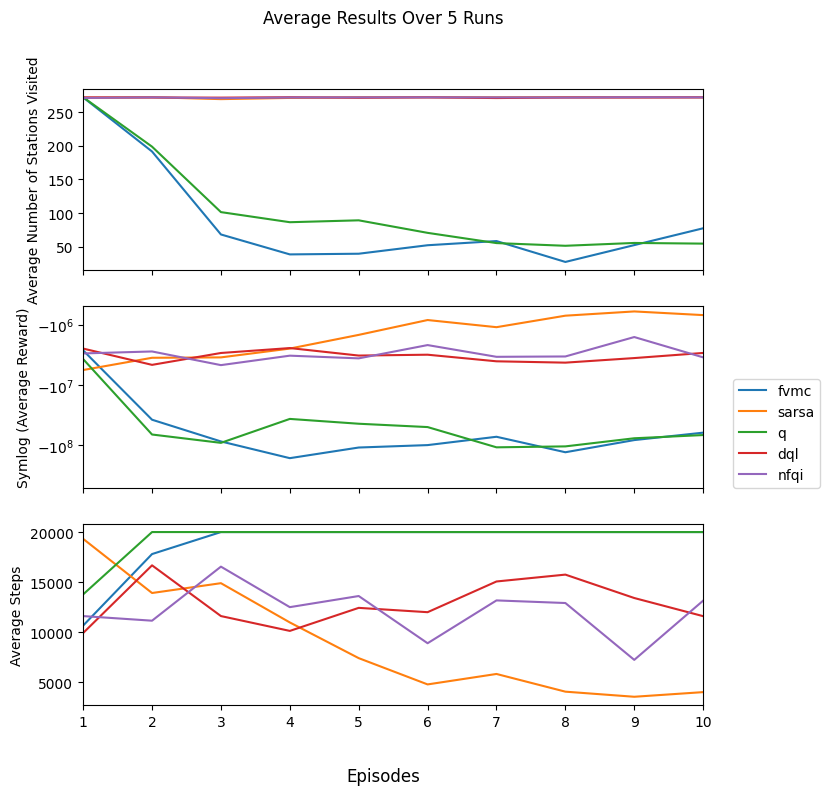

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,8), sharex=True)

initial_models_plot(d['num_visited'], 0)
initial_models_plot(d['reward'], 1)
initial_models_plot(d['steps'], 2)
fig.supxlabel("Episodes")
plt.suptitle("Average Results Over 5 Runs");

The first graph plots average number of stations visited (explored) within 20,000 steps against episode number. The episode is considered a success if the agent visits all 272 stations within the 20,000-step limit and will receive a completion bonus; otherwise, the episode is forcibly terminated. We observe that SARSA, NFQI and DQL agents all successfully travelled to all 272 stations within 20,000 steps, while the FVMC and Q-learning agents performed much worse, with a decreasing number of stations visited as episode number progressed.

The second graph plots the average reward against episode number. The y-axis is plotted on a symmetric log scale (`symlog`). Since each step the agent receives a negative reward (except for the completion bonus), the closer to zero the better the performance of the agent. We observe that SARSA performed the best, followed by NFQI and DQL which performed similarly, and FVMC and Q-learning agents again performed significantly worse.

The third graph plots the average number of steps taken in an episode against episode number. The episode is terminated after 20,000 steps. We observe that after the first episode for Q-learning, and the first two episodes for FVMC, the agent has failed to visit all 272 stations and thus the average number of steps is 20,000. The NFQI and DQL agents performed similarly, and the average number of steps remained between 10,000 and 15,000 steps for the first 10 episodes. Finally, the SARSA agent performed the best with a decreasing number of steps required to visit all 272 stations as episode number progressed.

The time taken to run 10 episodes was also significantly different for each of the models. SARSA was the fastest, taking just 2 minutes to run 10 episodes, followed by NFQI taking approximately 5 minutes to run 10 episodes. The FVMC and Q-learning algorithms took longer, at about 10 minutes to run 10 episodes. Finally, the DQL algorithm was the most time consuming, taking more than 30 minutes to run 10 episodes.

## 3.6 Training for SARSA and Deep Q-Learning

Based on the preliminary results observed in the previous section, we select two agents: SARSA and DQL, for further analysis. 

We train these two agents for 100 episodes to determine their performance in the longer term.



### 3.6.1 SARSA

#### 3.6.1.1 Hyperparameter Tuning

To train a better model with SARSA, we ran further trials on learning rate $\alpha$ and epsilon decay rate $\mu$, as we thought these two parameters may have a larger influence on model performance. A learning rate that is too high would lead to the model not converging; while a learning rate that is too low would take too long to converge to an optimal solution. Similarly, we thought that an epsilon decay rate that is too low (epsilon would decrease very quickly) would lead to too little exploration and thus mean we cannot find an optimal solution, where one that is too high would also lead to too much exploration and thus non-convergence. 

##### Tuning for alpha

We trialled 5 settings for alpha and present the results with these settings as follows. Each setting was trialled to 50 episodes to balance between the time demanded for running the code and also the usefulness of the obtained results to training our final model (which we hope to run for more episodes). We plot the moving average of results over episodes due to the high degree of fluctuation observed over individual episodes. 

In [ ]:
results = []
alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001]
gamma = 1.0

for alpha in alphas:
    
    env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
    
    policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, 
                              smart_decay=True, strategy="pow")
    
    agent_sarsa = SARSAAgent(alpha=alpha, gamma=gamma, tau=tau, 
                            env=env, policy=policy,
                            state_progress=True, 
                            episode_length_limit=episode_length_limit)
    
    agent_sarsa.run(50)
    
    clear_output(wait=True)
    print(datetime.now())
    
    results.append([alpha, agent_sarsa.num_visited_per_episode, agent_sarsa.reward_per_episode, agent_sarsa.steps_per_episode])


In [ ]:
# Plot
for i in range(5):
    series = pd.Series(results[i][3].copy())
    rolling_mean = series.rolling(window=10).mean()
    plt.plot(rolling_mean, label=f'$\\alpha=${alphas[i]}')

plt.xlabel('Episodes')
plt.ylabel('Steps Moving Average 10')
plt.title('SARSA Steps over episodes with different $\\alpha$ values')
plt.legend(bbox_to_anchor=(1.3, 0.5), loc='right')
plt.show()

![images/sarsa_alpha.png](images/sarsa_alpha.png)

From the graph, although $\alpha = 0.1$ overall yields the lowest moving average of steps across most episodes, $\alpha = 0.01$ shows the most learning and progress over episodes and indicates convergence may be happening. Thus, it seems more likely that $\alpha = 0.01$ would be more appropriate for training an agent over more episodes. We thus treat this rate as fix while tuning for epsilon decay rate.


##### Tuning for epsilon decay rate

In [ ]:
results_e = []
alpha = 0.01
decay_rates = [0.995, 0.999, 0.9995, 0.9999, 0.99995, 0.99999, 0.999995, 0.999999, 0.9999995]
gamma = 1.0

for decay_rate in decay_rates:
    print(decay_rate)
    env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
    
    policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, decay_rate=decay_rate,
                              smart_decay=True, strategy="pow")
    
    agent_sarsa = SARSAAgent(alpha=alpha, gamma=gamma, tau=tau, 
                            env=env, policy=policy,
                            state_progress=True, 
                            episode_length_limit=episode_length_limit)
    
    agent_sarsa.run(50)
    
    clear_output(wait=True)
    print(f'Time: datetime.now(). decay_rate = {decay_rate} done.')
    
    results_e.append([decay_rate, agent_sarsa.num_visited_per_episode, agent_sarsa.reward_per_episode, agent_sarsa.steps_per_episode])

In [ ]:
# Plot
decay_rates = [0.995, 0.999, 0.9995, 0.9999, 0.99995, 0.99999, 0.999995, 0.999999, 0.9999995]

for i in range(9):
    series = pd.Series(results_e[i][3].copy())
    rolling_mean = series.rolling(window=20).mean()
    plt.plot(rolling_mean, label=f'$\\mu$ = {decay_rates[i]}')

plt.xlabel('Episodes')
plt.ylabel('Steps Moving Average 10')
plt.title('SARSA Steps over episodes with different $\\mu$ values')
plt.legend(bbox_to_anchor=(1.4, 0.5), loc='right')
plt.show()

![images/sarsa_mu.png](images/sarsa_mu.png)

From the graph, we observe that $\mu = 0.999995$ shows the sharpest decrease in (moving average of) steps over episodes, thus indicating better convergence. 

#### 3.6.1.2 Model at 100 episodes

In [ ]:
alpha = 0.01
decay_rate = 0.999995
gamma = 1.0

env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
    
policy = EpsilonGreedyPolicy(min_epsilon=min_epsilon, max_epsilon=max_epsilon, decay_rate=decay_rate, 
                          smart_decay=True, strategy="pow")

agent_sarsa = SARSAAgent(alpha=alpha, gamma=gamma, tau=tau, 
                        env=env, policy=policy,
                        state_progress=True, 
                        episode_length_limit=episode_length_limit)

agent_sarsa.run(100)

#### 3.6.1.3 Model at 500 episodes

As SARSA is relatively quick to run, we decide to see if the performance of the model can be further improved with more runs, and ran the agent for 400 more episodes till 500 episodes in total.

In [ ]:
agent_sarsa.run(400)

### 3.6.2 Deep Q-Learning

#### 3.6.2.1 Hyperparameter Tuning

Since training the DQL model is very time consuming, taking more than 30 minutes to run just 10 episodes, trialling multiple hyperparameters across high number of episodes in a systematic way for the best values for hyperparameters is not very practical. Instead, a more heuristic approach was used to determine the appropriate values for the hyperparameters. Several combinations of minibatch size when performing the SGD update and the update frequency was tried. We note that performing updates more frequently and using a larger minibatch size both lead to longer running time, with no significant improvements (or changes) to the results. The hyperparameters used for the DQL model is the same as the ones mentioned for the initial results.

#### 3.6.2.2 Model at 100 episodes

In [ ]:
num_visited["dql_long"] = list()
reward["dql_long"] = list()
steps["dql_long"] = list()

env = TubeMap(dist_csv, stations_csv, q_table_initialiser=0, 
                complete_bonus=complete_bonus, beta=beta, eta=eta)
loss = nn.MSELoss(reduction="mean")
dqlnetwork_local = DQLNetwork()
dqlnetwork_target = DQLNetwork()
optimizer = optim.Adam(dqlnetwork_local.parameters())
replay_buffer = ReplayBuffer(buffer_size=int(1e5), batch_size=32)
agent_dql_long = DQLAgent(dqlnetwork_local, dqlnetwork_target, optimizer, replay_buffer, 
                        state_progress=True, policy=None, env=env, 
                        episode_length_limit=episode_length_limit, 
                        device=torch.device("mps"), update_every=8,
                        tau=tau, lambd=0.001, gamma=1.0,
                        min_epsilon=min_epsilon, max_epsilon=max_epsilon, decay_rate=decay_rate)

agent_dql_long.run(100)
num_visited["dql_long"].append(agent_dql_long.num_visited_per_episode)
reward["dql_long"].append(agent_dql_long.reward_per_episode)
steps["dql_long"].append(agent_dql_long.steps_per_episode)

# 4.&nbsp;Final Results and Discussion

## 4.1 Comparing SARSA and Deep Q-Learning at 100 Episodes

The figures below compares the performance of SARSA and Deep Q-Learning at 100 episodes for moving average of number of steps and reward over the episodes. 

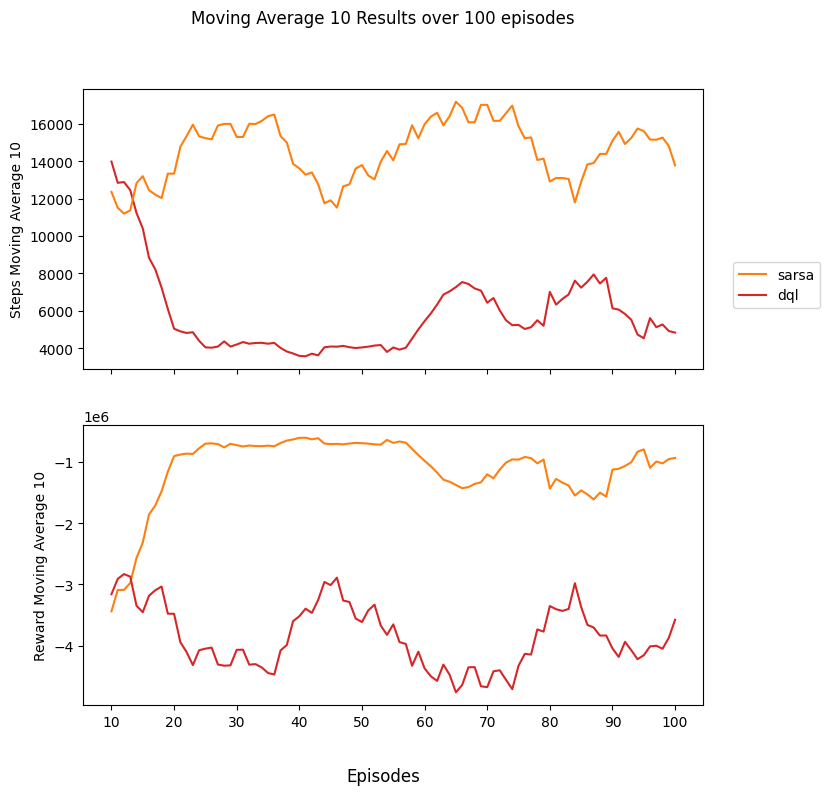

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,8), sharex=True)

# Steps Moving Average
window = 10
series = pd.Series(agent_sarsa.steps_per_episode.copy())
rolling_mean = series.rolling(window=window).mean()
axs[0].plot(np.arange(1,101), rolling_mean, label='sarsa', color='tab:red')

series = pd.Series(agent_dql_long.steps_per_episode.copy())
rolling_mean = series.rolling(window=window).mean()
axs[0].plot(np.arange(1,101), rolling_mean, label='dql', color='tab:orange')

axs[0].set_ylabel(f'Steps Moving Average {window}')
axs[0].set_xticks(np.arange(0,101,10))


# Reward Moving Average
series = pd.Series(agent_sarsa.reward_per_episode.copy())
rolling_mean = series.rolling(window=window).mean()
axs[1].plot(np.arange(1, 101), rolling_mean, label='sarsa', color='tab:orange')

series = pd.Series(agent_dql_long.reward_per_episode.copy())
rolling_mean = series.rolling(window=window).mean()
axs[1].plot(np.arange(1,101), rolling_mean, label='dql', color='tab:red')

axs[1].set_ylabel(f'Reward Moving Average {window}')
axs[1].legend(bbox_to_anchor=(1.2, 1.5), loc='right')

fig.supxlabel("Episodes")
plt.suptitle(f"Moving Average {window} Results over 100 episodes");

## 4.2 SARSA at 500 Episodes

In [ ]:
with open('/content/drive/MyDrive/new/pickles/agent_sarsa_2257.pkl', 'rb') as f:
    agent_sarsa_500 = pickle.load(f)

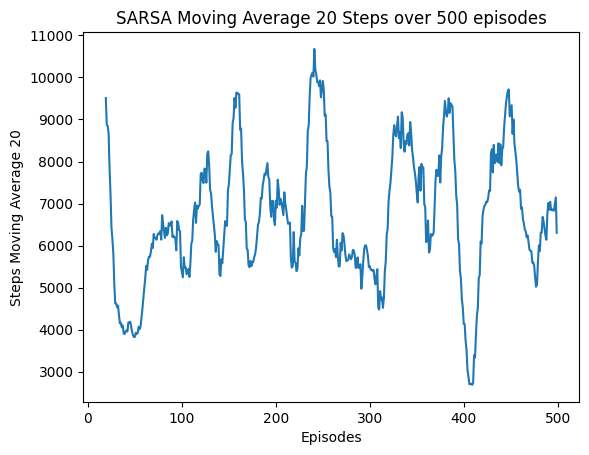

In [ ]:
%matplotlib inline
window=20

series = pd.Series(agent_sarsa_500.steps_per_episode.copy())
rolling_mean = series.rolling(window=window).mean()
plt.plot(rolling_mean, label=f'Steps Moving Average {window}')

plt.xlabel('Episodes')
plt.ylabel(f'Steps Moving Average {window}')
plt.title(f'SARSA Moving Average {window} Steps over 500 episodes')
plt.show()

## 4.3 Visualising Final Route

### 4.3.1 Tube Route Animation Function

We wrote a function which animates the route on a streamlined version of the Tube Map to help us visualise the final route. 

In [120]:
def plot_tube_route(stations_list, station_csv, time = 250):
    # Getting corresponding coordinates from stations list
    stations = pd.read_csv(station_csv)
    stations_list = [np.trunc(x) for x in stations_list if x != 0.0]
    stations_merged = pd.merge(pd.DataFrame({'id': stations_list}), stations, on='id', how='left')
    x_coords = list(stations_merged['map x'])
    y_coords = list(stations_merged['map y'])
    station_names = list(stations_merged['station'])

    # Initialize Figure
    fig = plt.figure(figsize=(10,7))
    ax = plt.axes()

    # Initialize Line and Scatters
    line, = ax.plot([], [], lw=2)
    sc2 = ax.scatter(stations['map x'], stations['map y'], c='#DCDCDC', s=10) # all stations
    sc = ax.scatter([], [], s=10) # visited stations
    sc1 = ax.scatter([], [], c='r', s=10) # current station
    
    # Initialize Text
    station_text = ax.text(0.02, 0.95, '')
    legend_text = ax.text(1, 0.5, 'Visited Stations: 0/272')

    def init():
        ax.set_xlim(0.5, 10)
        ax.set_ylim(7, 0)
        return line,

    def update(frame):
        # line
        x = x_coords[:frame+1]
        y = y_coords[:frame+1]
        line.set_data(x, y)
        
        # scatter
        sc.set_offsets(np.column_stack((x, y)))
        sc.set_sizes([20]*len(x))
        
        sc1.set_offsets([[x[-1], y[-1]]])
        sc1.set_sizes([20])

        # text fir station name
        station_text.set_text(station_names[frame])
        station_text.set_position((x[-1]+0.25, y[-1]))
        
        legend_text.set_text(f'Visited Stations:{len(set(stations_list[:frame+1]))}/272')
        
        return line, station_text, sc, sc1,

    ani = FuncAnimation(fig, update, frames=len(x_coords), interval=time, init_func=init, blit=True)
    
    return ani

### 4.3.2 Visualisations

In [ ]:
# Save Animation as mp4 using FFMpeg
anim = plot_tube_route(agent_dql_long.state_history, "dataset/new/stations3.csv")
FFwriter = FFMpegWriter()
anim.save("animations/dql_route.mp4", writer=FFwriter)

In [ ]:
anim = plot_tube_route(agent_sarsa.state_history, "dataset/new/stations3.csv")
FFwriter = FFMpegWriter()
anim.save("animations/sarsa_route.mp4", writer=FFwriter)

In [124]:
# Load Animation from saved mp4 file
Video("animations/dql_route.mp4", width=1000)

In [125]:
Video("animations/sarsa_route.mp4", width=1000)

Finally, we also show below an actual route that is taken for the "Tube Challenge".

In [129]:
knownroute_pd = pd.read_csv("dataset/new/knownroute.csv")
knownroute = [0.] + knownroute_pd["id2"].to_list()

In [ ]:
anim = plot_tube_route(knownroute, "dataset/new/stations3.csv")
FFwriter = FFMpegWriter()
anim.save("animations/knownroute_route.mp4", writer=FFwriter)

In [133]:
Video("animations/knownroute_route.mp4", width=1000)

# 5.&nbsp;Conclusion

Overall, we found that SARSA performed the best by far both in terms of the number of steps taken for the optimal route and also computation time required. We designed a reward function with numerous components that aims to encourage the agent to travel to all stations with the least number of steps. We trialled various weighting of the components as hyperparameters to find a decently good combination, and compared 5 models preliminarily across 10 episodes, using heuristics to determine model-specific hyperparameters to use. With the results for SARSA and Q-learning being the most promising, we trained two models SARSA and Deep Q-Learning further by tuning their hyperparameters and running them for more episodes - 100 for Deep Q-Learning and 500 for SARSA. Comparing the two models at the 100th episode reveals SARSA performs better than Deep-Q learning. We further ran SARSA for 400 more episodes to a total of 500 episodes, but unfortunately found that there were no significant further improvements to the model. 

The best plotted route was SARSA at 1999 steps, and the lowest number of steps in an episode for SARSA was at 1647 steps. Though this is a reasonably good result considering the complexity of the problem, it is still considerably more than the steps for a route taken by a previous Tube challenger that we found 433 steps, and likely still more steps than a route that a human can design by simply looking at the graph. We note that the original problem we intended to solve is to minimise the time taken to travel to all stations. However, the time taken is intrinsically related to the number of steps taken, as taking fewer steps will necessitate a shorter total travel time to all 272 stations.

Our results highlight the importance of reward design especially for TSP type problems, as the absence of a definitive end state means that one cannot simply add an extremely high reward to the end state. A more careful design and trial of the reward function may improve performance of our models and better lead to convergence. More complex models such as REINFORCE may also yield improvements, though it may come at the cost of higher running times and computation costs. 

# 6.&nbsp;References

Gawley, M. (2011). Network Simplification. www.TheTubeChallenge.com. https://sites.google.com/site/mytubechallenge/projectplan/primarydatagathering/2-network-simplification 

Gambardella, L. M., & Dorigo, M. (1995). Ant-Q: A reinforcement learning approach to the traveling salesman problem. In Machine learning proceedings 1995 (pp. 252-260). Morgan Kaufmann.

Greco, N. (2017). Tubemaps. GitHub repository, https://github.com/nicola/tubemaps/tree/master

Guiness World Records (2016). Fastest time to travel to all London Underground stations. Guiness World Records. https://web.archive.org/web/20160304083335/http://www.guinnessworldrecords.com/world-records/fastest-time-to-travel-to-all-london-underground-stations/

Ottoni, A. L., Nepomuceno, E. G., Oliveira, M. S. D., & Oliveira, D. C. D. (2022). Reinforcement learning for the traveling salesman problem with refueling. Complex & Intelligent Systems, 8(3), 2001-2015.

O'Brien O. and Cheshire, J. Tube Challenge! https://mappinglondon.co.uk/2014/tube-challenge/

The Telegraph (2016). How to do the Tube Challenge. The Telegraph. https://www.telegraph.co.uk/travel/news/How-to-do-the-Tube-Challenge/ 

Transport for London. Working Timetables (WTT). https://tfl.gov.uk/corporate/publications-and-reports/working-timetables

Zheng, J., He, K., Zhou, J., Jin, Y., & Li, C.-M. (2021). Combining Reinforcement Learning with Lin-Kernighan-Helsgaun Algorithm for the Traveling Salesman Problem. Proceedings of the AAAI Conference on Artificial Intelligence, 35(14), 12445-12452. https://doi.org/10.1609/aaai.v35i14.17476

